# Lamine Yamal's UEFA Euro 2024 performance

## Introduction

This analysis focuses on Lamine Yamal's performances in UEFA Euro 2024 Men's competition. Our aim is to quantitatively show that the numerous records he broke, the two awards received and the captured hearts of football fans and professionals around the world were completely justified and well-deserved.

## Methodology

The data, utilised in this study, was obtained from StatsBomb [open data](https://github.com/statsbomb/open-data) repository and consisted of event data corresponding to UEFA 2024 Men's competition. I looked at the data from two perspectives, namely (i) effectiveness of actions; and (ii) summarising statistics, pertaining to actions per 90 minutes.

In order to quantitatively capture effectiveness, I chose $xT$ (expected threat) and $xA$ (expected assists) as metrics of interest. The former associates values to actions that move the ball from zone $i$ to zone $j$, as part of a discrete possession; whereas $xA$ is defined in terms of $xG$ (expected goals), generated by passing the ball to a teammate, who then goes on to perform a shot. Then for a single such pass, $xA$ is equal to the $xG$ of the shot it contributed to. Concretely, this study utilises StatsBomb's $xG$ model. The $xT$ implementation utilised in this analysis is the one provided via the [`socceraction`](https://socceraction.readthedocs.io/en/latest/documentation/valuing_actions/xT.html) package by Maaike Van Roy, Pieter Robberechts, Tom Decroos, and Jesse Davis; it defines actions contributing to $xT$ to be passes, dribbles and crosses.

In terms of comparing summary statistics &mdash; based on actions per 90 minutes &mdash; I heuristically pruned the dataset by eliminating actions performed by players, whose total playing time was less than $4 \times 90$ minutes, in order to avoid artificially inflated outliers. This resulted in a dataset, consisting of $36133$ actions, performed by $114$ players, who had competed for $24$ teams in total.

I chose three statistical tests for drawing hypotheses regarding whether the distribution of the underlying data follows the normal distribution, namely: _Shapiro-Wilk_, _Kolmogorov-Smirnov_ and _D'Agostino's $K$-squared_. The ultimate purpose was determining whether the selected player on focus &mdash; Lamine Yamal &mdash; did stand out as a result and, if yes, in which instances that was the case. Statistically speaking, this translates to utilising methods for detection of points from a sample, which happen to be _outliers_, i.e., in some way 'not quite like' the rest of the sample, colloquially speaking.

The distribution of each action type were examined &mdash; visually, via the violin plots, which are presented in the figure below &mdash; as well as via the aforementioned methods for normality testing. The results confidently rejected the null hypotheses that any of the action samples might be normally distributed. Subsequently, this informed the choice of outlier detection methods: the [_interquartile range method_](https://en.wikipedia.org/wiki/Interquartile_range), or _IQR_; and a modified version of _Chebyshev's inequality_ (introduced in Kumari, R. and Chakraborty, S.: June 2022, **A simple but effective method for outlier detection using Chebyshev's inequality**, _American Institute of Physics Conference Series_, Vol. 2471, Issue 1.), which is suitable for non-normally distributed data.

## Results

<table style="border-collapse: collapse; border: none;">
    <tr style="vertical-align: top;">
        <td style="border: none;">
            <img src="yamal_xt_areas_shots.png" alt="$xT$ (expected threat) generated by Yamal across all matches, with colour-coded intensity of the corresponding actions" width="800"/>
        </td>
        <td style="border: none;">
            <img src="yamal_passes_assists.png" alt="$xA$, i.e., shot assists (with annotated outcomes), weighted by their $xG$ contributions" width="700"/>
        </td>
    </tr>
</table>

In the above figure, I present Lamine Yamal's areas of activity, weighted based on his $xT$ across all of his matches. I also overlay a plot of Yamal's shots with their corresponding $xG$ values and outcomes. Despite that goals are usually the most memorable aspect of football history, in Yamal's case he was clearly shining in other regards. Those were also memorable _and_ reflected quantitatively as well. In order to demonstrate this, I plotted Yamal's assists, weighted by the degree of $xG$ they generated correspondingly (which constitute the $xA$ values for those assists).

The areas from which Yamal created the most headaches for his opponents &mdash; as seen on the match broadcasts &mdash; were confirmed via the the $xT$ heatmap plot, too. It can also be seen that despite not having been able to realise goals from his probabilistically more favourable opportunities &mdash; as measured by the $xG$ of those shots &mdash; what would be awarded the goal of the tournament later on, turned out to have been one of the most difficult shots which Yamal took across all of his matches.

![The distributions of the actions, per 90 minutes of playing time, along with threshold lines corresponding to the (i) top 10 players, in terms of each action type; as well as outlier &mdash; i.e., overperformer &mdash; regions, as identified by the employed outlier detection methods, namely (ii) interquartile range ($IQR$) and (iii) modified Chebyshev's inequality ($\hat{CI}$). Yamal's position and rank are annotated on each sub-plot.](euro2024_actions_distribution.png "The distributions of the actions, per 90 minutes of playing time, along with threshold lines corresponding to the (i) top 10 players, in terms of each action type; as well as outlier &mdash; i.e., overperformer &mdash; regions, as identified by the employed outlier detection methods, namely (ii) interquartile range ($IQR$) and (iii) modified Chebyshev's inequality ($\hat{CI}$). Yamal's position and rank are annotated on each sub-plot.")

In the figure above, I present the distribution of player actions per 90 minutes, along with visual indicators (vertical threshold lines) for overperformers as detected by the aforementioned statistical methods, as well as top 10 thresholds. Additionally, I annotated with dark grey text the distributions with the corresponding places where Yamal ranked, and his data points have been plotted in red to clearly indicate his position, relative to the thresholds, as well as the remaining data points. Please, note that &mdash; due to the nature of the underlying distribution samples &mdash; some of the methods didn't detect any outliers in some instances.

The $xT$ generated by Lamal per 90 minutes of playing time was more than any other player in the entire tournament. It is also evident that Yamal generated an outstanding number of goal opportunities, which is captured by his top $xA$ score and his top goal assist count. Yamal demonstrated strong ability to position himself in the attacking third and recover the ball, which is also vital and can give rise to dangerous situations and counter-attacks. Yamal also topped the goals + assists ranking, sharing the first place with his Spanish teammate Dani Olmo, who scored 3 goals and assisted 2, but due to Olmo's lower number of playing minutes, Yamal finished second in the normalised version of this metric.

## Conclusion

In this analysis, I focused on Lamine Yamal's actions in the UEFA Euro 2024 men's competition via identifying a set of actions, occurring in the final third of the pitch. I discarded actions from players, who played less than $4 \times 90$ minutes in total, and subsequently normalised the actions on a per-90-minutes basis. I then performed statistical tests regarding the distributions of the underlying data, which then informed my subsequent statistical steps, in terms of methods which were chosen to identify outliers in the data. As such, I employed those as a proxy for delineating significant performers across each action type.

In [53]:
import pickle
from collections import Counter, defaultdict
from os import path

import cmasher as cmr
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import Normalize
from mplsoccer import Pitch, Sbopen
from scipy.stats import (
    kstest,
    normaltest,
    shapiro,
)


final_3rd_x = Pitch().dim.length * (2.0 / 3.0)

def load_events():
    output_pickle_fname = 'euro_2024_events.pkl'
    output_json_fname = 'euro_2024_events.json'

    output_pickle_matches_fname = 'euro_2024_matches.pkl'
    output_json_matches_fname = 'euro_2024_matches.json'

    if path.exists(output_pickle_fname) and path.exists(output_pickle_matches_fname):
        with open(output_pickle_fname, 'rb') as f:
            events = pickle.load(f)

        with open(output_pickle_matches_fname, 'rb') as f:
            matches = pickle.load(f)
    
        return events, matches

    parser = Sbopen()
    comps = parser.competition()
    euro2024 = comps[(comps['competition_name'] == 'UEFA Euro') & (comps['season_name'] == '2024')]
    matches = parser.match(competition_id=euro2024.competition_id.values[0], season_id=euro2024.season_id.values[0])
    events = pd.concat((
        parser.event(match_id)[0]
        for match_id in matches['match_id'].tolist()
    ), ignore_index=True)

    events.to_pickle(output_pickle_fname)
    events.to_json(output_json_fname)

    matches.to_pickle(output_pickle_matches_fname)
    matches.to_json(output_json_matches_fname)
    return events, matches

def in_final_3rd(events):
    return events[events['x'] >= final_3rd_x]

def by_event_types(events, event_types):
    return events[events['type_name'].map(lambda t: t in event_types)]

mbappe_id = 3009
yamal_id = 316046
olmo_id = 16532

events, matches = load_events()
player_names = {
    int(p.player_id): p.player_name
    for _, p in events[['player_id', 'player_name']].drop_duplicates().dropna().iterrows()
}
player_names

{99174: 'Kobbie Mainoo',
 3468: 'Jordan Pickford',
 2988: 'Memphis Depay',
 3669: 'Virgil van Dijk',
 3244: 'John Stones',
 10955: 'Harry Kane',
 21582: 'Tijjani Reijnders',
 20750: 'Cody Mathès Gakpo',
 3205: 'Kyle Walker',
 3306: 'Nathan Aké',
 7787: 'Stefan de Vrij',
 15503: 'Jerdy Schouten',
 8125: 'Denzel Dumfries',
 15582: 'Donyell Malen',
 34526: 'Marc Guehi',
 3943: 'Declan Rice',
 30714: 'Jude Bellingham',
 3308: 'Kieran Trippier',
 4354: 'Phil Foden',
 22084: 'Bukayo Saka',
 39167: 'Xavi Simons',
 37274: 'Bart Verbruggen',
 21633: 'Joey Veerman',
 3382: 'Luke Shaw',
 7829: 'Wout Weghorst',
 4760: 'Ollie Watkins',
 39461: 'Cole Palmer',
 33281: 'Joshua Zirkzee',
 21880: 'Brian Brobbey',
 29399: 'Conor Gallagher',
 11748: 'Unai Simón Mendibil',
 22128: 'Robin Aime Robert Le Normand',
 5721: 'Daniel Carvajal Ramos',
 16532: 'Daniel Olmo Carvajal',
 3477: 'Álvaro Borja Morata Martín',
 316046: 'Lamine Yamal Nasraoui Ebana',
 6765: 'Rodrigo Hernández Cascante',
 4353: 'Aymeric Lap

In [38]:
def get_minutes(events):
    minutes_by_match_id = (
        events[events.type_name == "Half End"]
        .reset_index()[['match_id', 'minute']]
        .set_index('match_id')
        .to_dict()['minute']
    )

    minutes_sub_off = (
        events[events.type_name == "Substitution"][['match_id', 'player_id', 'minute']]
        .groupby(['match_id', 'player_id'])
        .first()
        .reset_index()
        .astype(int)
        .set_index(['match_id', 'player_id'])
        .to_dict()['minute']
    )
    for (match_id, player_id), minutes in list(minutes_sub_off.items()):
        minutes_sub_off.setdefault(player_id, {})[match_id] = minutes

    minutes_sub_on = (
        events[events.type_name == "Substitution"][['match_id', 'substitution_replacement_id', 'minute']]
        .groupby(['match_id', 'substitution_replacement_id'])
        .first()
        .reset_index()
        .astype(int)
        .set_index(['match_id', 'substitution_replacement_id'])
        .to_dict()['minute']
    )
    for (match_id, player_id), minutes in list(minutes_sub_on.items()):
        minutes_sub_on.setdefault(player_id, {})[match_id] = minutes

    player_minutes = defaultdict(lambda: defaultdict(int))
    for _, match_player in (
        events[(~events.player_id.isna()) & (events.type_name != "Substitution")][['match_id', 'player_id']]
        .astype(int)
        .drop_duplicates()
        .iterrows()
    ):
        match_id, player_id = match_player
        if match_id in minutes_sub_off.get(player_id, {}):
            player_minutes[player_id][match_id] = minutes_sub_off[player_id][match_id]
            continue

        if match_id in minutes_sub_on.get(player_id, {}):
            player_minutes[player_id][match_id] = minutes_by_match_id[match_id] - minutes_sub_on[player_id][match_id]
            continue

        player_minutes[player_id][match_id] = minutes_by_match_id[match_id]

    minutes = pd.DataFrame(player_minutes).sum()
    minutes.name = "minutes"
    return minutes

minutes = get_minutes(events)
assert minutes[minutes.index == yamal_id].values[0] == 514
assert minutes[minutes.index == mbappe_id].values[0] == 477

In [ ]:
# NOTE: This needs to be done after calculating the minutes, as the events which delineate period boundaries don't have
# associated player_id values.
events = events[events['player_id'].notna()]
events['player_id'] = events['player_id'].astype(int)
events = events.merge(
    events[['id', 'shot_statsbomb_xg']], 
    left_on='pass_assisted_shot_id', 
    right_on='id', 
    suffixes=('', '_extra'), 
    how='left'
)
assert events.size > 0

def normalize_event_type(et):
    return "_".join(map(str.lower, et.split()))

# xA (full pitch) per 90 mins (not normalised and not summed up).
events.rename(columns={'shot_statsbomb_xg_extra': 'pass_assisted_shot_statsbomb_xg'}, inplace=True)

# Drop redundant 'id' column resulting from the merge.
events.drop(columns=['id_extra'], inplace=True)

assert len([c for c in events.columns if c.endswith('_extra')]) == 0

ball_receipts_recoveries_f3 = in_final_3rd(events)
ball_receipts_recoveries_event_types = [
    "Ball Receipt",
    "Ball Recovery",
]

# Ball receipts in the final third per 90 mins (not normalised yet).
# Ball recoveries in the final third per 90 mins (not normalised yet).
ball_receipts_recoveries_f3 = by_event_types(ball_receipts_recoveries_f3, ball_receipts_recoveries_event_types)
assert ball_receipts_recoveries_f3.size > 0

# Passes into the final third per 90 mins (to be normalised).
passes_f3 = events[
    (events.end_x >= final_3rd_x) & 
    (events.type_name == "Pass") & 
    (events.outcome_name.isna())
]
assert passes_f3.size > 0

# Carries into the final third per 90 mins.
carries_f3 = events[
    (events.end_x >= final_3rd_x) & 
    (events.type_name == "Carry") & 
    (events.outcome_name.isna())
]
assert carries_f3.size > 0

# Shot assists (full pitch) per 90 mins (includes goal assists) (to be normalised).
shot_assists = events[events.pass_goal_assist.notna() | events.pass_shot_assist.notna()]
assert np.isnan(shot_assists.outcome_name.unique()[0])
shot_assists_type_names = shot_assists.type_name.unique()
assert len(shot_assists_type_names) == 1
assert shot_assists_type_names[0] == "Pass"
assert shot_assists.pass_assisted_shot_statsbomb_xg.isna().sum() == 0.0
assert shot_assists.pass_assisted_shot_statsbomb_xg.sum() > 0.0
assert np.all(shot_assists[['player_id', 'pass_assisted_shot_statsbomb_xg']].groupby('player_id').sum() > 0.0)
assert shot_assists.size > 0

# Goal assists (full pitch) per 90 mins (to be normalised).
goal_assists = shot_assists[shot_assists.pass_shot_assist.isna()]
assert goal_assists.pass_assisted_shot_statsbomb_xg.isna().sum() == 0.0
assert goal_assists.pass_assisted_shot_statsbomb_xg.sum() > 0.0
assert np.all(goal_assists[['player_id', 'pass_assisted_shot_statsbomb_xg']].groupby('player_id').sum() > 0.0)
assert goal_assists.size > 0

# Non-penalty xG (full pitch) per 90 mins (to be normalised).
# Shots per 90 mins (to be normalised).
shots = events[
    (events.type_name == "Shot") & 
    (events.sub_type_name != "Penalty")
]
assert shots[shots.sub_type_name == "Penalty"].size == 0
assert shots.size > 0

# Shots on target per 90 mins (to be normalised).
shots_on_target = shots[
    (shots.outcome_name == "Goal") |
    (shots.outcome_name == "Saved") |
    (shots.outcome_name == "Saved to Post")
]
assert shots_on_target[shots_on_target.sub_type_name == "Penalty"].size == 0
assert shots_on_target.size > 0

# Non-penalty goals scored per 90 mins (to be normalised).
goals = shots_on_target[shots_on_target.outcome_name == "Goal"]
assert goals[goals.sub_type_name == "Penalty"].size == 0
assert goals.size > 0

# Goal assists + non-penalty goals.
goal_assists_goals = pd.concat([goal_assists, goals], axis=0)
assert goal_assists_goals[goal_assists_goals.sub_type_name == "Penalty"].size == 0
assert goal_assists_goals.size > 0
assert goal_assists_goals.size == goal_assists.size + goals.size

In [ ]:
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl
import socceraction.xthreat as xthreat

def calculate_xt(xt_output_fname='xt_comp_id_55_season_id_282.pkl'):
    if path.exists(xt_output_fname):
        with open(xt_output_fname, 'rb') as f:
            return pickle.load(f)

    # Load a set of actions to train the model on.
    SBL = StatsBombLoader()
    df_games = SBL.games(competition_id=55, season_id=282)
    dataset = [
        {
            **game,
            'actions': spadl.statsbomb.convert_to_actions(
                events=SBL.events(game['game_id']),
                home_team_id=game['home_team_id']
            )
        }
        for game in df_games.to_dict(orient='records')
    ]

    # Convert direction of play and add names.
    df_actions_ltr = pd.concat([
    spadl.play_left_to_right(game['actions'], game['home_team_id'])
    for game in dataset
    ])
    df_actions_ltr = spadl.add_names(df_actions_ltr)

    # Train the xT model with respect to a 16x12 grid.
    xTModel = xthreat.ExpectedThreat(l=16, w=12)
    xTModel.fit(df_actions_ltr)

    # Rate ball-progressing actions.
    # xT should only be used to value actions that:
    # - move the ball, and
    # - keep the current team in possession of the ball.
    df_mov_actions = xthreat.get_successful_move_actions(df_actions_ltr)
    df_mov_actions["xT_value"] = xTModel.rate(df_mov_actions)
    assert np.allclose(
        df_mov_actions[df_mov_actions.player_id==316046][['type_name', 'xT_value']].groupby('type_name').sum(),
        [0.552327, 0.485668, 0.524814],
        atol=1e-6,
    )

    df_mov_actions.to_pickle(xt_output_fname)
    return df_mov_actions

xt = calculate_xt()

events_xt = pd.merge(
    events,
    xt.rename(columns={'xT_value': 'xt'}),
    left_on='id',
    right_on='original_event_id',
    suffixes=('_left', '_right'),
)

# Drop duplicated columns (possibly, with different data types detected or NaN filling methods applied),
# #resulting from merging.
for col in events_xt.columns:
    if col.endswith('_right') and col[:-6] + '_left' in events_xt.columns:
        if events_xt[col].equals(events_xt[col[:-6] + '_left']):
            events_xt = events_xt.drop(columns=[col]).rename(columns={col: col[:-6]})

assert np.all(events_xt.player_id_left == events_xt.player_id_right)
events_xt.drop(columns=['player_id_right'], inplace=True)
events_xt.rename(columns={'player_id_left': 'player_id'}, inplace=True)

In [41]:
study_stats = {
    "goal_assists": goal_assists,
    "shot_assists": shot_assists,
    "xa": None,
    "passes_f3": passes_f3,
    "np_goals": goals,
    "np_xg": None,
    "np_g_xg": None,
    "np_shots": shots,
    "np_shots_on_target": shots_on_target,
    "ball_receipts_f3": ball_receipts_recoveries_f3[ball_receipts_recoveries_f3.type_name == "Ball Receipt"],
    "ball_recoveries_f3": ball_receipts_recoveries_f3[ball_receipts_recoveries_f3.type_name == "Ball Recovery"],
    "carries_f3": carries_f3,
    "xt": events_xt,
    "goal_assists_np_goals": goal_assists_goals,
}

for k, v in study_stats.items():
    if v is None:
        print(f"WARNING: {k} (study_stats) is None")
        assert k in ['xa', 'np_xg', 'np_g_xg', 'xt']
        continue
    assert v.size > 0, f"{k} size: 0"

expected = {
    mbappe_id: {
        'goal_assists': 1,
        'shot_assists': 3,
        'shots': 24,
        'goals': 0,
        'passes_completed': 161,
        'crosses_completed': 3,
        'goal_assists_goals': 1,
    },
    yamal_id: {
        'goal_assists': 4,
        'shot_assists': 18,
        'shots': 18,
        'goals': 1,
        'passes_completed': 161,
        'crosses_completed': 4,
        'goal_assists_goals': 5,
    },
}

def group_events(df, colname, fn, rename_column=None):
    df_ = getattr(df[[colname, 'player_id']].groupby('player_id'), fn)()
    if rename_column is not None:
        df_.rename(columns={colname: rename_column}, inplace=True)
    assert df_.shape[1] == 1
    return df_.squeeze()

# Non-penalty xG (full pitch) per 90 mins.
xg = shots[['player_id', 'shot_statsbomb_xg']].groupby('player_id').count()

study_summary_stats = {
    stat: group_events(study_stats[stat], 'id', 'count', rename_column='count')
    for stat in [
        "goal_assists", 
        "shot_assists",
        "passes_f3",
        "goal_assists_np_goals",
        "np_goals",    
        "np_shots",
        "np_shots_on_target",
        "ball_receipts_f3",
        "ball_recoveries_f3",
        "carries_f3",
    ]
}
study_summary_stats['xa'] = group_events(shot_assists, 'pass_assisted_shot_statsbomb_xg', 'sum')
study_summary_stats['np_xg'] = group_events(shots, 'shot_statsbomb_xg', 'sum')
study_summary_stats['np_g_xg'] = (study_summary_stats['np_goals'].reindex(study_summary_stats['np_xg'].index).fillna(0) - study_summary_stats['np_xg'])
study_summary_stats['xt'] = group_events(events_xt, 'xt', 'sum')

def count_events(df, player_id):
    try:
        return group_events(df, 'id', 'count').loc[player_id]
    except KeyError:
        return 0 # No entries.

actual = {
    player_id: {
        'shot_assists': [
            Counter(shot_assists.player_id.astype(int).values)[player_id],
            count_events(shot_assists, player_id),
        ],
        'goal_assists': [
            Counter(goal_assists.player_id.astype(int).values)[player_id],
            count_events(goal_assists, player_id),
        ],
        'goal_assists_goals': [
            Counter(goal_assists.player_id.astype(int).values)[player_id] + count_events(goals, player_id),
            count_events(goal_assists, player_id) + count_events(goals, player_id),
        ],
        'passes_completed': [
            count_events(events[
                (events.type_name == "Pass") &
                (events.outcome_name.isna())
            ], player_id),
        ],
        'crosses_completed': [
            count_events(events[
                (events.pass_cross.notna()) &
                (events.outcome_name.isna())
            ], player_id),
        ],
        'goals': [
            count_events(goals, player_id),
        ],
        'shots': [
            count_events(events[events.type_name == "Shot"], player_id),
        ],
    }
    for player_id in expected.keys()
}

for player_id, stats in expected.items():
    for k, v in stats.items():
        for v_ in actual[player_id][k]:
            assert v == v_, f"[{player_id}] {k}: {v} (expected) v {v_} (actual)"

assert study_summary_stats['np_xg'].loc[yamal_id] == events[(events.player_id == yamal_id)].shot_statsbomb_xg.sum() == 1.58723324, f"{study_summary_stats['np_xg'].loc[yamal_id]} v {events[(events.player_id == yamal_id)].shot_statsbomb_xg.sum()}"
assert study_summary_stats['xa'].loc[yamal_id] == events[events.id.isin(events[(events.player_id == yamal_id) & events.pass_assisted_shot_id.notna()].pass_assisted_shot_id)].shot_statsbomb_xg.sum() == 2.159429698

assert study_summary_stats['np_g_xg'].loc[39565] == 2.099035549
assert study_summary_stats['np_g_xg'].loc[20750] == 2.115059296
assert study_summary_stats['np_g_xg'].loc[28032] == 2.123134774

for k, v in study_summary_stats.items():
    if v is None:
        print(f"WARNING: {k} (study_summary_stats) is None")
        continue
    assert v.size > 0, f"{k} size: 0"

non_90m_keys = list(study_summary_stats.keys())

for stat in non_90m_keys:
    key_90m = f'{stat}_90m'
    if key_90m not in study_summary_stats:
        study_summary_stats[key_90m] = 90 * study_summary_stats[stat] / minutes

for stat in list(study_summary_stats.keys()):
    assert np.allclose((study_summary_stats['np_g_xg_90m'] * minutes / 90)[study_summary_stats['np_g_xg'].index], study_summary_stats['np_g_xg'])

for k, v in study_summary_stats.items():
    if v is None:
        print(f"WARNING: {k} is None")
    assert v.size > 0, f"{k} size: 0"

for k, v in {
    99174: 0.044451,
    3468: 0.041438,
    2988: 0.069645,
    3669: 0.057681,
    3244: 0.050135,
    10919: 0.065006,
    9722: 0.032369,
    7480: 0.080266,
    7036: 0.017395,
    11514: 0.092077,
}.items():
    assert v == round(study_summary_stats['xt_90m'][k], 6)

study_summary_stats_df = pd.DataFrame(study_summary_stats)
study_summary_stats_df.fillna({c: 0.0 for c in study_summary_stats_df.columns if c != 'xt' and c != 'xt_90m'}, inplace=True)
assert study_summary_stats_df.isna().sum().sum() == sum(study_summary_stats_df[c].isna().sum() for c in ['xt', 'xt_90m'])

In [42]:
events_xt.xt.describe()

count    86296.000000
mean         0.000920
std          0.007589
min         -0.205510
25%         -0.000346
50%          0.000000
75%          0.001160
max          0.217285
Name: xt, dtype: float64

In [43]:
minutes_pruned = minutes[minutes >= 360]
study_summary_stats_pruned_df = study_summary_stats_df.loc[minutes_pruned.index]
study_summary_stats_pruned_df.loc[yamal_id].T

goal_assists                   4.000000
shot_assists                  18.000000
passes_f3                    100.000000
goal_assists_np_goals          5.000000
np_goals                       1.000000
np_shots                      18.000000
np_shots_on_target             7.000000
ball_receipts_f3             170.000000
ball_recoveries_f3            14.000000
carries_f3                   174.000000
xa                             2.159430
np_xg                          1.587233
np_g_xg                       -0.587233
xt                             1.619353
goal_assists_90m               0.700389
shot_assists_90m               3.151751
passes_f3_90m                 17.509728
goal_assists_np_goals_90m      0.875486
np_goals_90m                   0.175097
np_shots_90m                   3.151751
np_shots_on_target_90m         1.225681
ball_receipts_f3_90m          29.766537
ball_recoveries_f3_90m         2.451362
carries_f3_90m                30.466926
xa_90m                         0.378110


In [86]:
threshold = 0.05

for c in study_summary_stats_pruned_df.columns.tolist()[:-1]:
    data = study_summary_stats_pruned_df[c]
    res = shapiro(data)
    print(f"[{['Fail to reject', 'Reject'][int(res.pvalue < threshold)]}, Shapiro-Wilk, {c}] {res}")
    if 'e' in str(res.pvalue):
        pvalue = str(res.pvalue).split('e')
        pvalue = f"{round(float(pvalue[0]), 2)}e{pvalue[1]}"
    else:
        pvalue = round(res.pvalue, 2)

    res = kstest(data, 'norm')
    print(f"[{['Fail to reject', 'Reject'][int(res.pvalue < threshold)]}, Kolmogorov-Smirnov, {c}] {res}")
    if 'e' in str(res.pvalue):
        pvalue = str(res.pvalue).split('e')
        pvalue = f"{round(float(pvalue[0]), 2)}e{pvalue[1]}"
    else:
        pvalue = round(res.pvalue, 2)

    res = normaltest(data)
    print(f"[{['Fail to reject', 'Reject'][int(res.pvalue < threshold)]}, D'Agostino's K-squared, {c}] {res}")

    # Test the distributions comprised of all non-zero samples and annotate the test results with an asterisk.
    data = study_summary_stats_pruned_df[c][data != 0.0]
    res = shapiro(data)
    print(f"*[{['Fail to reject', 'Reject'][int(res.pvalue < threshold)]}, Shapiro-Wilk, {c}] {res}")
    res = kstest(data, 'norm')
    print(f"*[{['Fail to reject', 'Reject'][int(res.pvalue < threshold)]}, Kolmogorov-Smirnov, {c}] {res}")
    res = normaltest(data)
    print(f"*[{['Fail to reject', 'Reject'][int(res.pvalue < threshold)]}, D'Agostino's K-squared, {c}] {res}")

[Reject, Shapiro-Wilk, goal_assists] ShapiroResult(statistic=0.502635229833246, pvalue=6.3740002887067395e-18)
[Reject, Kolmogorov-Smirnov, goal_assists] KstestResult(statistic=0.5, pvalue=7.038162000423776e-27, statistic_location=0.0, statistic_sign=-1)
[Reject, D'Agostino's K-squared, goal_assists] NormaltestResult(statistic=90.09400871234135, pvalue=2.7310810059895616e-20)
*[Reject, Shapiro-Wilk, goal_assists] ShapiroResult(statistic=0.6054896936599772, pvalue=7.117437004864544e-07)
*[Reject, Kolmogorov-Smirnov, goal_assists] KstestResult(statistic=0.8413447460685429, pvalue=1.443962898120834e-19, statistic_location=1.0, statistic_sign=-1)
*[Reject, D'Agostino's K-squared, goal_assists] NormaltestResult(statistic=21.757811536558933, pvalue=1.8851731938216714e-05)
[Reject, Shapiro-Wilk, shot_assists] ShapiroResult(statistic=0.8479117303882301, pvalue=1.8319469862838676e-09)
[Reject, Kolmogorov-Smirnov, shot_assists] KstestResult(statistic=0.6176007452448032, pvalue=2.0846809680951637

In [ ]:
def iqr(series):
    Q1 = np.percentile(series, 25)
    Q3 = np.percentile(series, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    inds = np.where((series < lower_bound) | (series > upper_bound))[0].tolist()
    return series.index[inds]

def modified_chebyshev(data, k=3):
    """
    Detect outliers in a dataset using the adapted Chebyshev method with median and MAD.
    From the paper:
    "For an arbitrary distribution which may be asymmetric, perhaps highly, we further propose to
    use (sample) median in place of mean and (sample) mean deviation (where deviations would be taken
    from median) in place of standard deviation to get the required range for outlier detection.
    This is motivated by the facts that median is a better average than mean for asymmetric distribution 
    and is also not affected by the presence of outliers."

    Parameters:
    - data: A list or numpy array of numerical values.
    - k: The number of MADs from the median to define the outlier threshold.

    Returns:
    - outliers: A list of outlier values.

    References:
        @INPROCEEDINGS{2022AIPC.2471b0007K,
        author = {{Kumari}, Ranjana and {Chakraborty}, Soubhik},
            title = "{A simple but effective method for outlier detection using Chebyshev's inequality}",
        booktitle = {American Institute of Physics Conference Series},
            year = 2022,
        series = {American Institute of Physics Conference Series},
        volume = {2471},
            month = jun,
        publisher = {AIP},
            eid = {020007},
            pages = {020007},
            doi = {10.1063/5.0082641},
        adsurl = {https://ui.adsabs.harvard.edu/abs/2022AIPC.2471b0007K},
        adsnote = {Provided by the SAO/NASA Astrophysics Data System}
    }
    """
    index = data.index
    data = np.asarray(data)

    median = np.median(data)
    mad = np.mean(np.abs(data - median))

    lower_bound = median - k * mad
    upper_bound = median + k * mad

    inds = np.where((data < lower_bound) | (data > upper_bound))[0].tolist()
    return index[inds]

In [88]:
outliers = {'iqr': {}, 'modified_chebyshev': {}}
outliers_summary = []

for c in study_summary_stats_pruned_df.columns.tolist()[:-1]:
    data = study_summary_stats_pruned_df[c]
    outliers_ = iqr(data)
    outlier_names = ', '.join(map(player_names.get, outliers_))
    yamal_in_outliers = ["N", "Y"][int(yamal_id in outliers_)]

    outliers_summary.append([c, len(outliers_), yamal_in_outliers, None, None])
    if len(outliers_):
        outliers['iqr'][c] = study_summary_stats_pruned_df[study_summary_stats_pruned_df.index.isin(outliers_)][c].min()

for i, c in enumerate(study_summary_stats_pruned_df.columns.tolist()[:-1]):
    data = study_summary_stats_pruned_df[c]
    outliers_ = modified_chebyshev(data)
    outlier_names = ', '.join(map(player_names.get, outliers_))
    yamal_in_outliers = ["N", "Y"][int(yamal_id in outliers_)]

    outliers_summary[i][3] = len(outliers_)
    outliers_summary[i][4] = yamal_in_outliers

    if len(outliers_):
        outliers['modified_chebyshev'][c] = study_summary_stats_pruned_df[study_summary_stats_pruned_df.index.isin(outliers_)][c].min()

outlier_df_columns = [
    'metric',
    'IQR num outliers',
    'IQR Yamal in outliers?',
    'CI num outliers',
    'CI Yamal in outliers?',
]

(pd.DataFrame(outliers_summary, columns=outlier_df_columns).set_index('metric')
    .style
    .set_caption('Outlier detection via IQR and CI')
    .apply(lambda col: ['background-color: ' + ['#d21f3c', 'green'][int(val == 'Y')] for val in col], subset=[c for c in outlier_df_columns if c.endswith('Yamal in outliers?')])
    .set_table_styles([
        dict(selector="th", props=[('max-width', '128px')]),
        dict(
            selector="th.col_heading",
            props=[
                ("writing-mode", "vertical-rl"), 
                ('transform', 'rotateZ(180deg)'),
                ('text-align', 'left'),
            ],
        )],
    )
)

,IQR num outliers,IQR Yamal in outliers?,CI num outliers,CI Yamal in outliers?
metric,,,,
goal_assists,24,Y,24,Y
shot_assists,4,Y,4,Y
passes_f3,0,N,0,N
goal_assists_np_goals,10,Y,14,Y
np_goals,28,Y,7,N
np_shots,8,Y,8,Y
np_shots_on_target,9,Y,9,Y
ball_receipts_f3,0,N,2,N
ball_recoveries_f3,1,N,4,Y


Num. subplots: 14


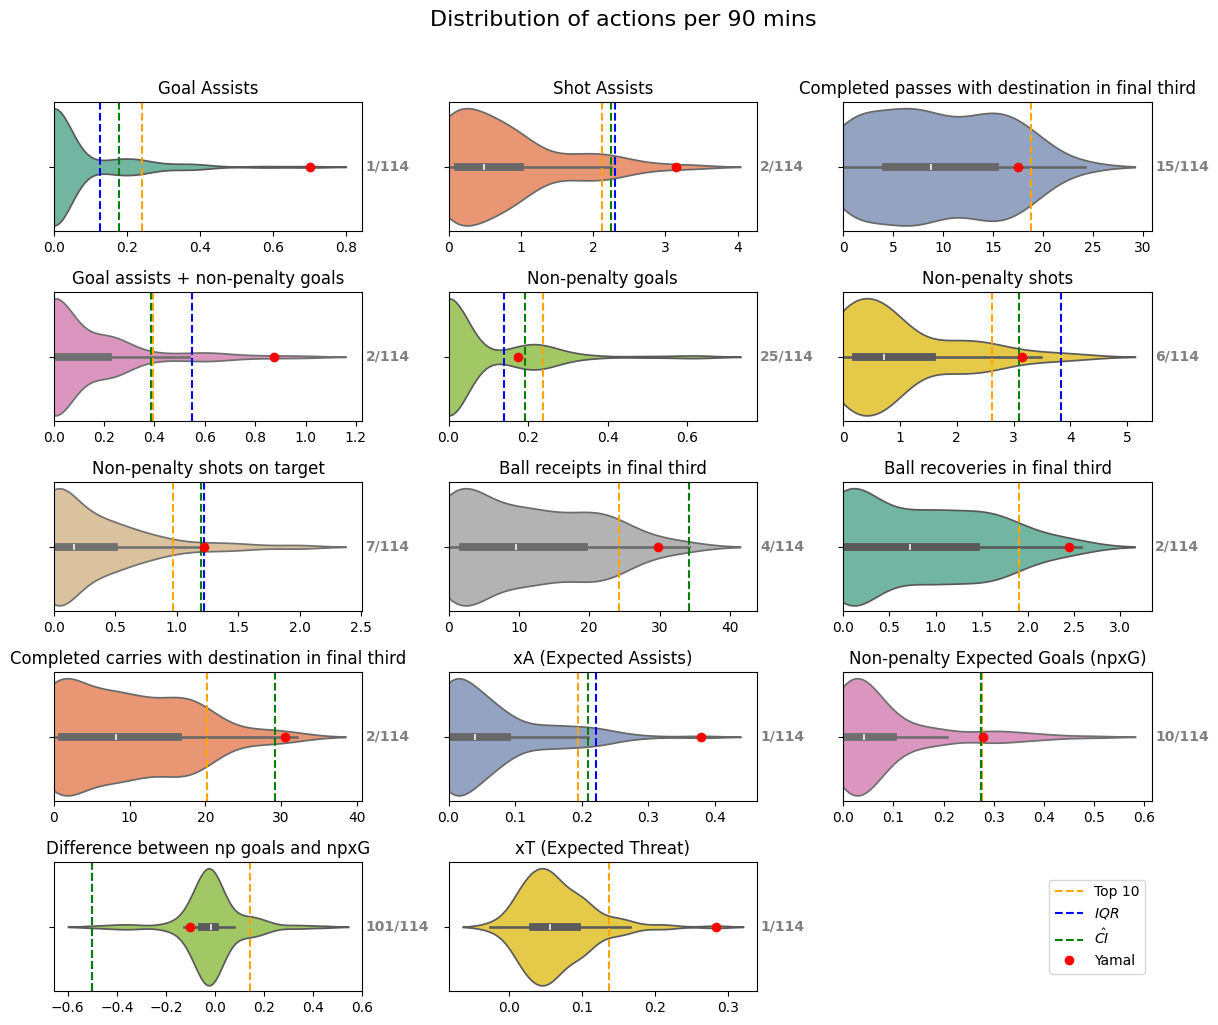

In [85]:
columns_to_include = [c for c in study_summary_stats_pruned_df.columns if c.endswith('_90m')]

df = study_summary_stats_pruned_df[columns_to_include]
n_subplots = len(columns_to_include)

n_cols = 3
n_rows = np.ceil(n_subplots / n_cols).astype(int)

print(f"Num. subplots: {n_subplots}")

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 10), sharex=False)
axes = axes.flatten()

colors = sns.color_palette('Set2', n_colors=n_subplots)

hrgn = {
    'carry': 'Carries',
    'ball_recovery': 'Ball recoveries',
    'foul_won': 'Fouls won',
    'shots_on_target': 'Shots on target',
    'passes_f3': 'Completed passes with destination in final third',
    'carries_f3': 'Completed carries with destination in final third',
    'np_goals': 'Non-penalty goals',
    'np_shots': 'Non-penalty shots',
    'np_shots_on_target': 'Non-penalty shots on target',
    'ball_receipts_f3': 'Ball receipts in final third',
    'ball_recoveries_f3': 'Ball recoveries in final third',
    'xa': 'xA (Expected Assists)',
    'np_xg': 'Non-penalty Expected Goals (npxG)',
    'np_g_xg': 'Difference between np goals and npxG',
    'xt': 'xT (Expected Threat)',
    'goal_assists_np_goals': 'Goal assists + non-penalty goals'
}
def human_readable_group_name(gn):
    if gn.endswith('_90m'):
        gn = gn[:-4]
    if gn in hrgn:
        return hrgn[gn]
    if gn[-1] != 's':
        gn = f'{gn}s'
    return ' '.join(map(str.capitalize, gn.split('_')))

# The 91.22th percentile is the top 10 threshold for a sample of 114 players.
assert study_summary_stats_pruned_df.shape[0] == 114 
top_10 = [np.percentile(values, 91.22) for values in df.values.T]

# Draw each sub-plot.
for i, (group_name, values) in enumerate(df.items()):
    n_samples = values.size
    yamal_rank = values.rank(method='min', ascending=False)[yamal_id].astype(int)

    sns.violinplot(x=values, ax=axes[i], color=colors[i], orient='h')
    
    axes[i].axvline(x=top_10[i], color='orange', linestyle='--')

    iqr_threshold = outliers['iqr'].get(group_name)
    if iqr_threshold is not None:
        axes[i].axvline(x=iqr_threshold, color='b', linestyle='--')

    modified_chebyshev_threshold = outliers['modified_chebyshev'].get(group_name)
    if modified_chebyshev_threshold is not None:
        axes[i].axvline(x=modified_chebyshev_threshold, color='g', linestyle='--')
    axes[i].scatter(values[yamal_id], 0, color='red', zorder=3)

    if group_name != 'np_g_xg_90m' and group_name != 'xt_90m':
        axes[i].set_xlim(left=0)

    axes[i].set_title(human_readable_group_name(group_name))
    axes[i].set_xlabel('')
    axes[i].text(1.01, 0.5, f'{yamal_rank}/{n_samples}', transform=axes[i].transAxes,
                 fontsize=10, verticalalignment='center', color='gray', fontweight='bold')

# Don't draw any unused subplots.
for j in range(n_subplots, n_rows * n_cols):
    # Hide the empty subplot (in this case, just the last one).
    axes[j].axis('off')

handles = [
    plt.Line2D([0], [0], color='orange', linestyle='--', label='Top 10'),
    plt.Line2D([0], [0], color='b', linestyle='--', label='$IQR$'),
    plt.Line2D([0], [0], color='g', linestyle='--', label='$\hat{CI}$'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Yamal')
]

labels = ['Top 10', '$IQR$', '$\hat{CI}$', 'Yamal']

# Position the legend in the last empty sub-plot position (bottom-left corner).
axes[-1].legend(handles=handles, loc='right', frameon=True)
axes[-1].axis('off')  # Hide the axis for the legend

fig.suptitle("Distribution of actions per 90 mins", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
fig.savefig(f"euro2024_actions_distribution.png", format='png', dpi=200)

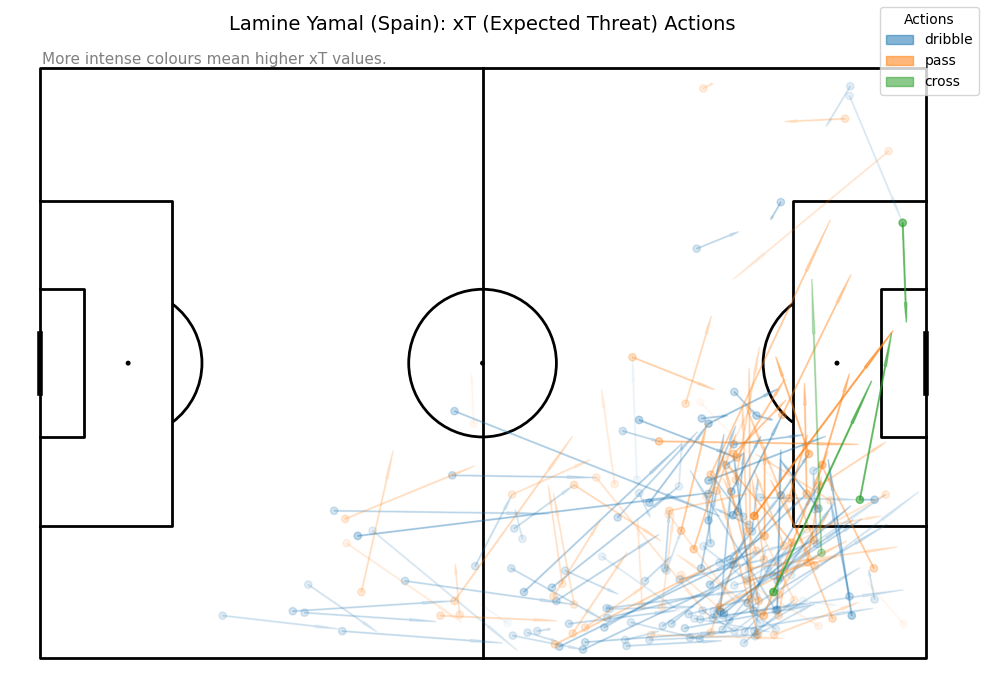

In [47]:
def plot_xt(xt):
    def scatter(ax, type_name, colour, do_arrows=True):
        for _, event in xt[xt.type_name_right == type_name].iterrows():
            x = event['x']
            y = event['y']

            circle = plt.Circle((x,y),0.5,color=colour)
            circle.set_alpha(max(0.0, event.xt)**0.3)
            ax.add_patch(circle)

            if do_arrows:
                dx = event['end_x_left'] - x
                dy = event['end_y_left'] - y
                arrow = plt.Arrow(x, y, dx, dy, width=0.5, color=colour)
                arrow.set_alpha(max(0.0, event.xt)**0.3)
                ax.add_patch(arrow)

    pitch = Pitch(line_color = "black")
    fig, ax = pitch.draw(figsize=(10, 7))

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

    legend_handles = []
    for i, type_name in enumerate(xt.type_name_right.unique()):
        scatter(ax, type_name, colors[i], do_arrows=True)
        legend_handles.append(mpatches.Patch(color=colors[i], alpha=0.55, label=type_name))
    
    ax.set_title("Lamine Yamal (Spain): xT (Expected Threat) Actions", fontsize=14)
    ax.text(
        0.3, -1.1,
        "More intense colours mean higher xT values.",
        ha='left', va='center',
        fontsize=11,
        color='gray',
    )
    fig.set_size_inches(10, 7)

    fig.legend(handles=legend_handles, title='Actions', loc='upper right')
    plt.show()
    fig.savefig(f"yamal_xt_actions.png", format='png', dpi=200)

plot_xt(events_xt[events_xt.player_id == yamal_id])

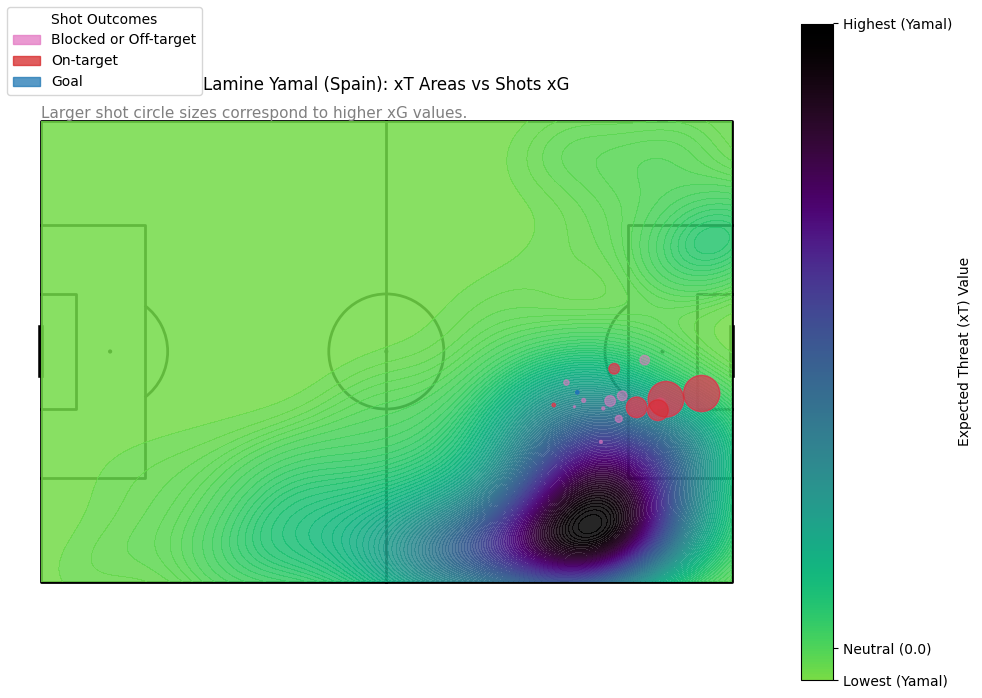

In [48]:
def plot_kde(xt, shots):
    pitch = Pitch(line_color = "black")
    fig, ax = pitch.draw(figsize=(10, 7))

    pitch.kdeplot(
        x=xt.x, y=xt.y,
        ax=ax,
        weights=xt.xt - xt.xt.min(),
        cmap=cmr.lavender_r,
        levels=100,
        thresh=0,
        fill=True,
        alpha=0.85,
    )
    
    normalised_cbar = Normalize(vmin=xt.xt.min(), vmax=xt.xt.max())
    cbar = fig.colorbar(
        plt.cm.ScalarMappable(norm=normalised_cbar, cmap=cmr.lavender_r),
        ax=ax, 
        orientation='vertical'
    )

    cbar.set_label('Expected Threat (xT) Value')
    cbar.set_ticks([xt.xt.min(), 0.0, xt.xt.max()])
    cbar.set_ticklabels([f'Lowest (Yamal)', 'Neutral (0.0)', 'Highest (Yamal)'])

    ax.set_title("Lamine Yamal (Spain): xT Areas vs Shots xG", fontsize = 12)
    ax.text(
        0.01, 0.01,
        'Larger shot circle sizes correspond to higher xG values.',
        ha='left', va='bottom',
        fontsize=11,
        color='gray',
    )
    fig.set_size_inches(10, 7)

    def scatter(ax, df, type_name, colour, do_arrows=True, alpha=(0.55, 0.5)):
        for _, event in df.iterrows():
            x=event['x']
            y=event['y']

            circle=plt.Circle((x,y),event['shot_statsbomb_xg']*11,color=colour)
            circle.set_alpha(alpha[0] if type_name != 'goals' else 1.0)
            ax.add_patch(circle)

            if do_arrows:
                dx = event['end_x_left'] - x
                dy = event['end_y_left'] - y
                arrow=plt.Arrow(x, y, dx, dy, width=0.5, color=colour)
                arrow.set_alpha(alpha[1])
                ax.add_patch(arrow)

    colors = ['#e377c2', '#d62728', '#1f77b4']
    hr_label = {
        'shots': 'Blocked or Off-target',
        'shots_on_target': 'On-target',
        'goals': 'Goal',
    }.get

    legend_handles = []
    for i, (type_name, df) in enumerate(shots.items()):
        scatter(ax, df, type_name, colors[i], do_arrows=False)
        legend_handles.append(mpatches.Patch(color=colors[i], alpha=0.75, label=hr_label(type_name)))

    fig.legend(handles=legend_handles, title='Shot Outcomes', loc='upper left')
    plt.show()
    fig.savefig(f"yamal_xt_areas_shots.png", format='png', dpi=200)

plot_kde(
    events_xt[events_xt.player_id == yamal_id],
    dict(
        shots=shots[shots.player_id == yamal_id][['x', 'y', 'shot_statsbomb_xg']],
        shots_on_target=shots_on_target[(shots_on_target.player_id == yamal_id) & (shots_on_target.outcome_name != 'Goal')][['x', 'y', 'shot_statsbomb_xg']],
        goals=shots_on_target[(shots_on_target.player_id == yamal_id) & (shots_on_target.outcome_name == 'Goal')][['x', 'y', 'shot_statsbomb_xg']],
    ),
)

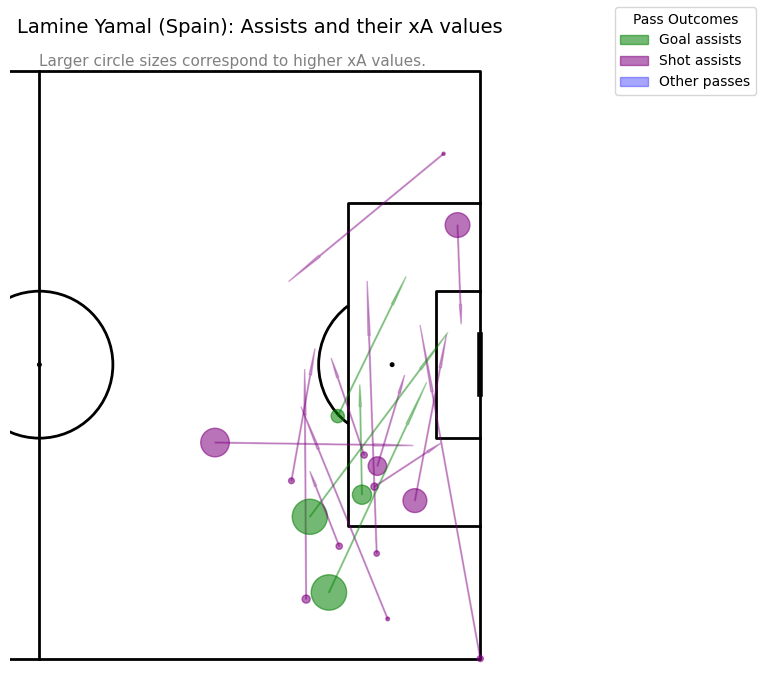

In [49]:
def plot_passes(passes):
    pitch = Pitch(line_color = "black", half=True)
    fig, ax = pitch.draw(figsize=(10, 7))

    alpha_ = {
        "assist": (.55, .35),
        "not_assist": (.35, .15),
    }

    for _, p in passes.iterrows():
        x = p['x']
        y = p['y']
    
        if p.pass_goal_assist == 1.0:
            colour = "green"
            alpha = alpha_["assist"]
            size = p['pass_assisted_shot_statsbomb_xg']*8
        elif p.pass_shot_assist==1.0:
            colour = "purple"
            alpha = alpha_["assist"]
            size = p['pass_assisted_shot_statsbomb_xg']*8
        else:
            continue

        passCircle = plt.Circle((x, y), size, color=colour)
        passCircle.set_alpha(alpha[0])
        ax.add_patch(passCircle)
        dx = p['end_x'] - x
        dy = p['end_y'] - y
        passArrow=plt.Arrow(x, y, dx, dy, width=0.5, color=colour)
        passArrow.set_alpha(alpha[1])
        ax.add_patch(passArrow)

    ax.set_title("Lamine Yamal (Spain): Assists and their xA values", fontsize=14)
    ax.text(
        60.0, -1.2,
        'Larger circle sizes correspond to higher xA values.',
        ha='left', va='center',
        fontsize=11,
        color='gray',
    )
    fig.set_size_inches(10, 7)

    legend_handles = [
        mpatches.Patch(color='green', alpha=0.55, label='Goal assists'),
        mpatches.Patch(color='purple', alpha=0.55, label='Shot assists'),
        mpatches.Patch(color='blue', alpha=0.35, label='Other passes'),
    ]

    fig.legend(handles=legend_handles, title='Pass Outcomes', loc='upper right')
    fig.tight_layout()
    plt.show()
    fig.savefig(f"yamal_passes_assists.png", format='png', dpi=200)

plot_passes(passes_f3[passes_f3.player_id == yamal_id][['x', 'y', 'end_x', 'end_y', 'pass_goal_assist', 'pass_shot_assist', 'pass_assisted_shot_statsbomb_xg']])

In [50]:
assert np.allclose(events_xt[(events_xt.player_id == yamal_id)][['type_name_right', 'xt']].groupby('type_name_right').min().values.tolist(), [[0.018633], [-0.010748], [-0.009044]], atol=1e-6)

olmo_stats = study_summary_stats_df.loc[olmo_id]
assert olmo_stats.goal_assists == 2
assert olmo_stats.shot_assists == 11
assert olmo_stats.np_shots == 17
assert olmo_stats.carries_f3 == 101
assert olmo_stats.passes_f3_90m == 12.8
assert olmo_stats.carries_f3_90m == 20.2

In [51]:
events_xt[(events_xt.player_id == yamal_id)][['type_name_right', 'xt']].groupby('type_name_right').min()

,xt
type_name_right,
cross,0.018633
dribble,-0.010748
pass,-0.009044


In [24]:
olmo_stats

goal_assists                   2.000000
shot_assists                  11.000000
passes_f3                     64.000000
goal_assists_np_goals          5.000000
np_goals                       3.000000
np_shots                      17.000000
np_shots_on_target             6.000000
ball_receipts_f3             107.000000
ball_recoveries_f3             8.000000
carries_f3                   101.000000
xa                             1.236572
np_xg                          1.378103
np_g_xg                        1.621897
xt                             0.529690
goal_assists_90m               0.400000
shot_assists_90m               2.200000
passes_f3_90m                 12.800000
goal_assists_np_goals_90m      1.000000
np_goals_90m                   0.600000
np_shots_90m                   3.400000
np_shots_on_target_90m         1.200000
ball_receipts_f3_90m          21.400000
ball_recoveries_f3_90m         1.600000
carries_f3_90m                20.200000
xa_90m                         0.247314
